In [142]:
import pandas as pd
import numpy as np
from ape_risk import strategies

In [143]:
r = 0.0004
params = [0, 0.005]
C = np.asarray([[1, 0.5, 0.8], [0.5, 1, 0.4], [0.8, 0.4, 1]])
scale = np.linalg.cholesky(C).tolist()
shift = np.asarray([0, 0, 0]).tolist()

In [144]:
C

array([[1. , 0.5, 0.8],
       [0.5, 1. , 0.4],
       [0.8, 0.4, 1. ]])

In [145]:
scale

[[1.0, 0.0, 0.0],
 [0.5, 0.8660254037844386, 0.0],
 [0.8, 0.0, 0.5999999999999999]]

In [146]:
strat = strategies.multi_gbms(initial_values=[1.0, 0.9, 0.8], num_points=10000, num_rvs=3, params=params, scale=scale, shift=shift)
strat_rn = strategies.multi_gbms(initial_values=[1.0, 0.9, 0.8], num_points=10000, num_rvs=3, params=params, scale=scale, shift=shift, r=r)

In [147]:
ex = strat.example()
ex

array([[[1.0032088 , 0.90200537, 0.8022188 ]],

       [[1.00213968, 0.89514494, 0.79810141]],

       [[1.00459759, 0.89526299, 0.79903745]],

       ...,

       [[1.22955355, 1.03388162, 0.82874532]],

       [[1.23048794, 1.0336112 , 0.83301734]],

       [[1.22885016, 1.03497326, 0.83072566]]])

In [148]:
ex = ex.reshape(10000, 3)
ex

array([[1.0032088 , 0.90200537, 0.8022188 ],
       [1.00213968, 0.89514494, 0.79810141],
       [1.00459759, 0.89526299, 0.79903745],
       ...,
       [1.22955355, 1.03388162, 0.82874532],
       [1.23048794, 1.0336112 , 0.83301734],
       [1.22885016, 1.03497326, 0.83072566]])

In [149]:
df = pd.DataFrame(ex, columns=['price0', 'price1', 'price2'])

In [150]:
df

,price0,price1,price2
0,1.003209,0.902005,0.802219
1,1.002140,0.895145,0.798101
2,1.004598,0.895263,0.799037
3,1.007049,0.898190,0.802226
4,1.012277,0.904758,0.804053
...,...,...,...
9995,1.246146,1.040679,0.835377
9996,1.241078,1.038261,0.834819
9997,1.229554,1.033882,0.828745
9998,1.230488,1.033611,0.833017


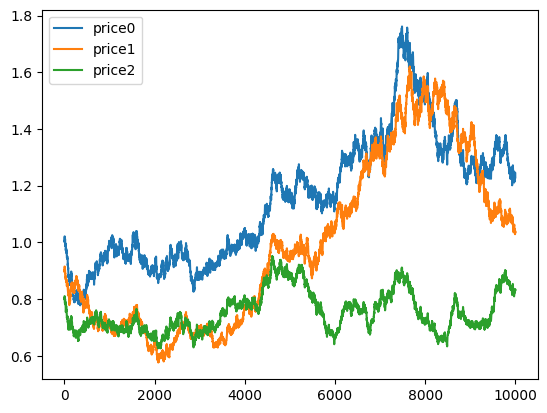

In [151]:
ax = df.plot()
ax.get_figure().savefig('multi_example.png')

In [152]:
df.to_csv("../tests/helpers/multi_example.csv", index=False)

In [153]:
ex_rn = strat_rn.example()
ex_rn

array([[[ 1.00205249,  0.89700343,  0.79853037]],

       [[ 0.99843714,  0.8891981 ,  0.79525527]],

       [[ 0.99593767,  0.89428868,  0.79399794]],

       ...,

       [[54.24923194, 45.88447193, 36.95098359]],

       [[54.36036168, 46.20050028, 36.97327206]],

       [[54.73549056, 46.10844221, 37.22835648]]])

In [154]:
ex_rn = ex_rn.reshape(10000, 3)
ex_rn

array([[ 1.00205249,  0.89700343,  0.79853037],
       [ 0.99843714,  0.8891981 ,  0.79525527],
       [ 0.99593767,  0.89428868,  0.79399794],
       ...,
       [54.24923194, 45.88447193, 36.95098359],
       [54.36036168, 46.20050028, 36.97327206],
       [54.73549056, 46.10844221, 37.22835648]])

In [158]:
df_rn = pd.DataFrame(ex_rn, columns=['price0 (Q)', 'price1 (Q)', 'price2 (Q)'])

In [159]:
df_rn

,price0 (Q),price1 (Q),price2 (Q)
0,1.002052,0.897003,0.798530
1,0.998437,0.889198,0.795255
2,0.995938,0.894289,0.793998
3,1.003451,0.902954,0.797766
4,1.006901,0.898251,0.801822
...,...,...,...
9995,54.713043,46.720080,37.003668
9996,54.444394,46.270813,36.867295
9997,54.249232,45.884472,36.950984
9998,54.360362,46.200500,36.973272


<AxesSubplot: >

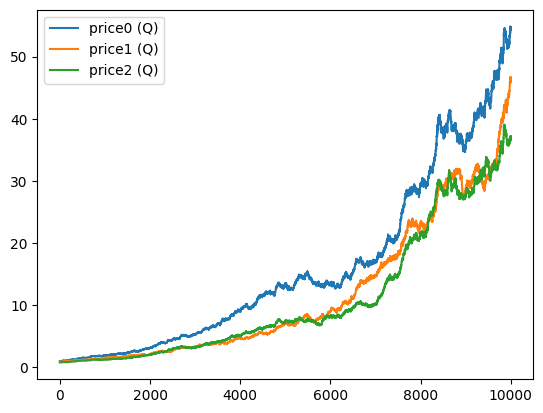

In [160]:
df_rn.plot()